<a href="https://colab.research.google.com/github/felipe24I/AprendizajeMaquina/blob/main/1_Probabilidades_Bayes/1_Ejercicio_IntroProbabilidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REPASO PROBABILIDAD (Ejercicio Teorema de Bayes)

## Ejercicio: teorema de bayes para dos cajas, dos frutas, resuelto a mano

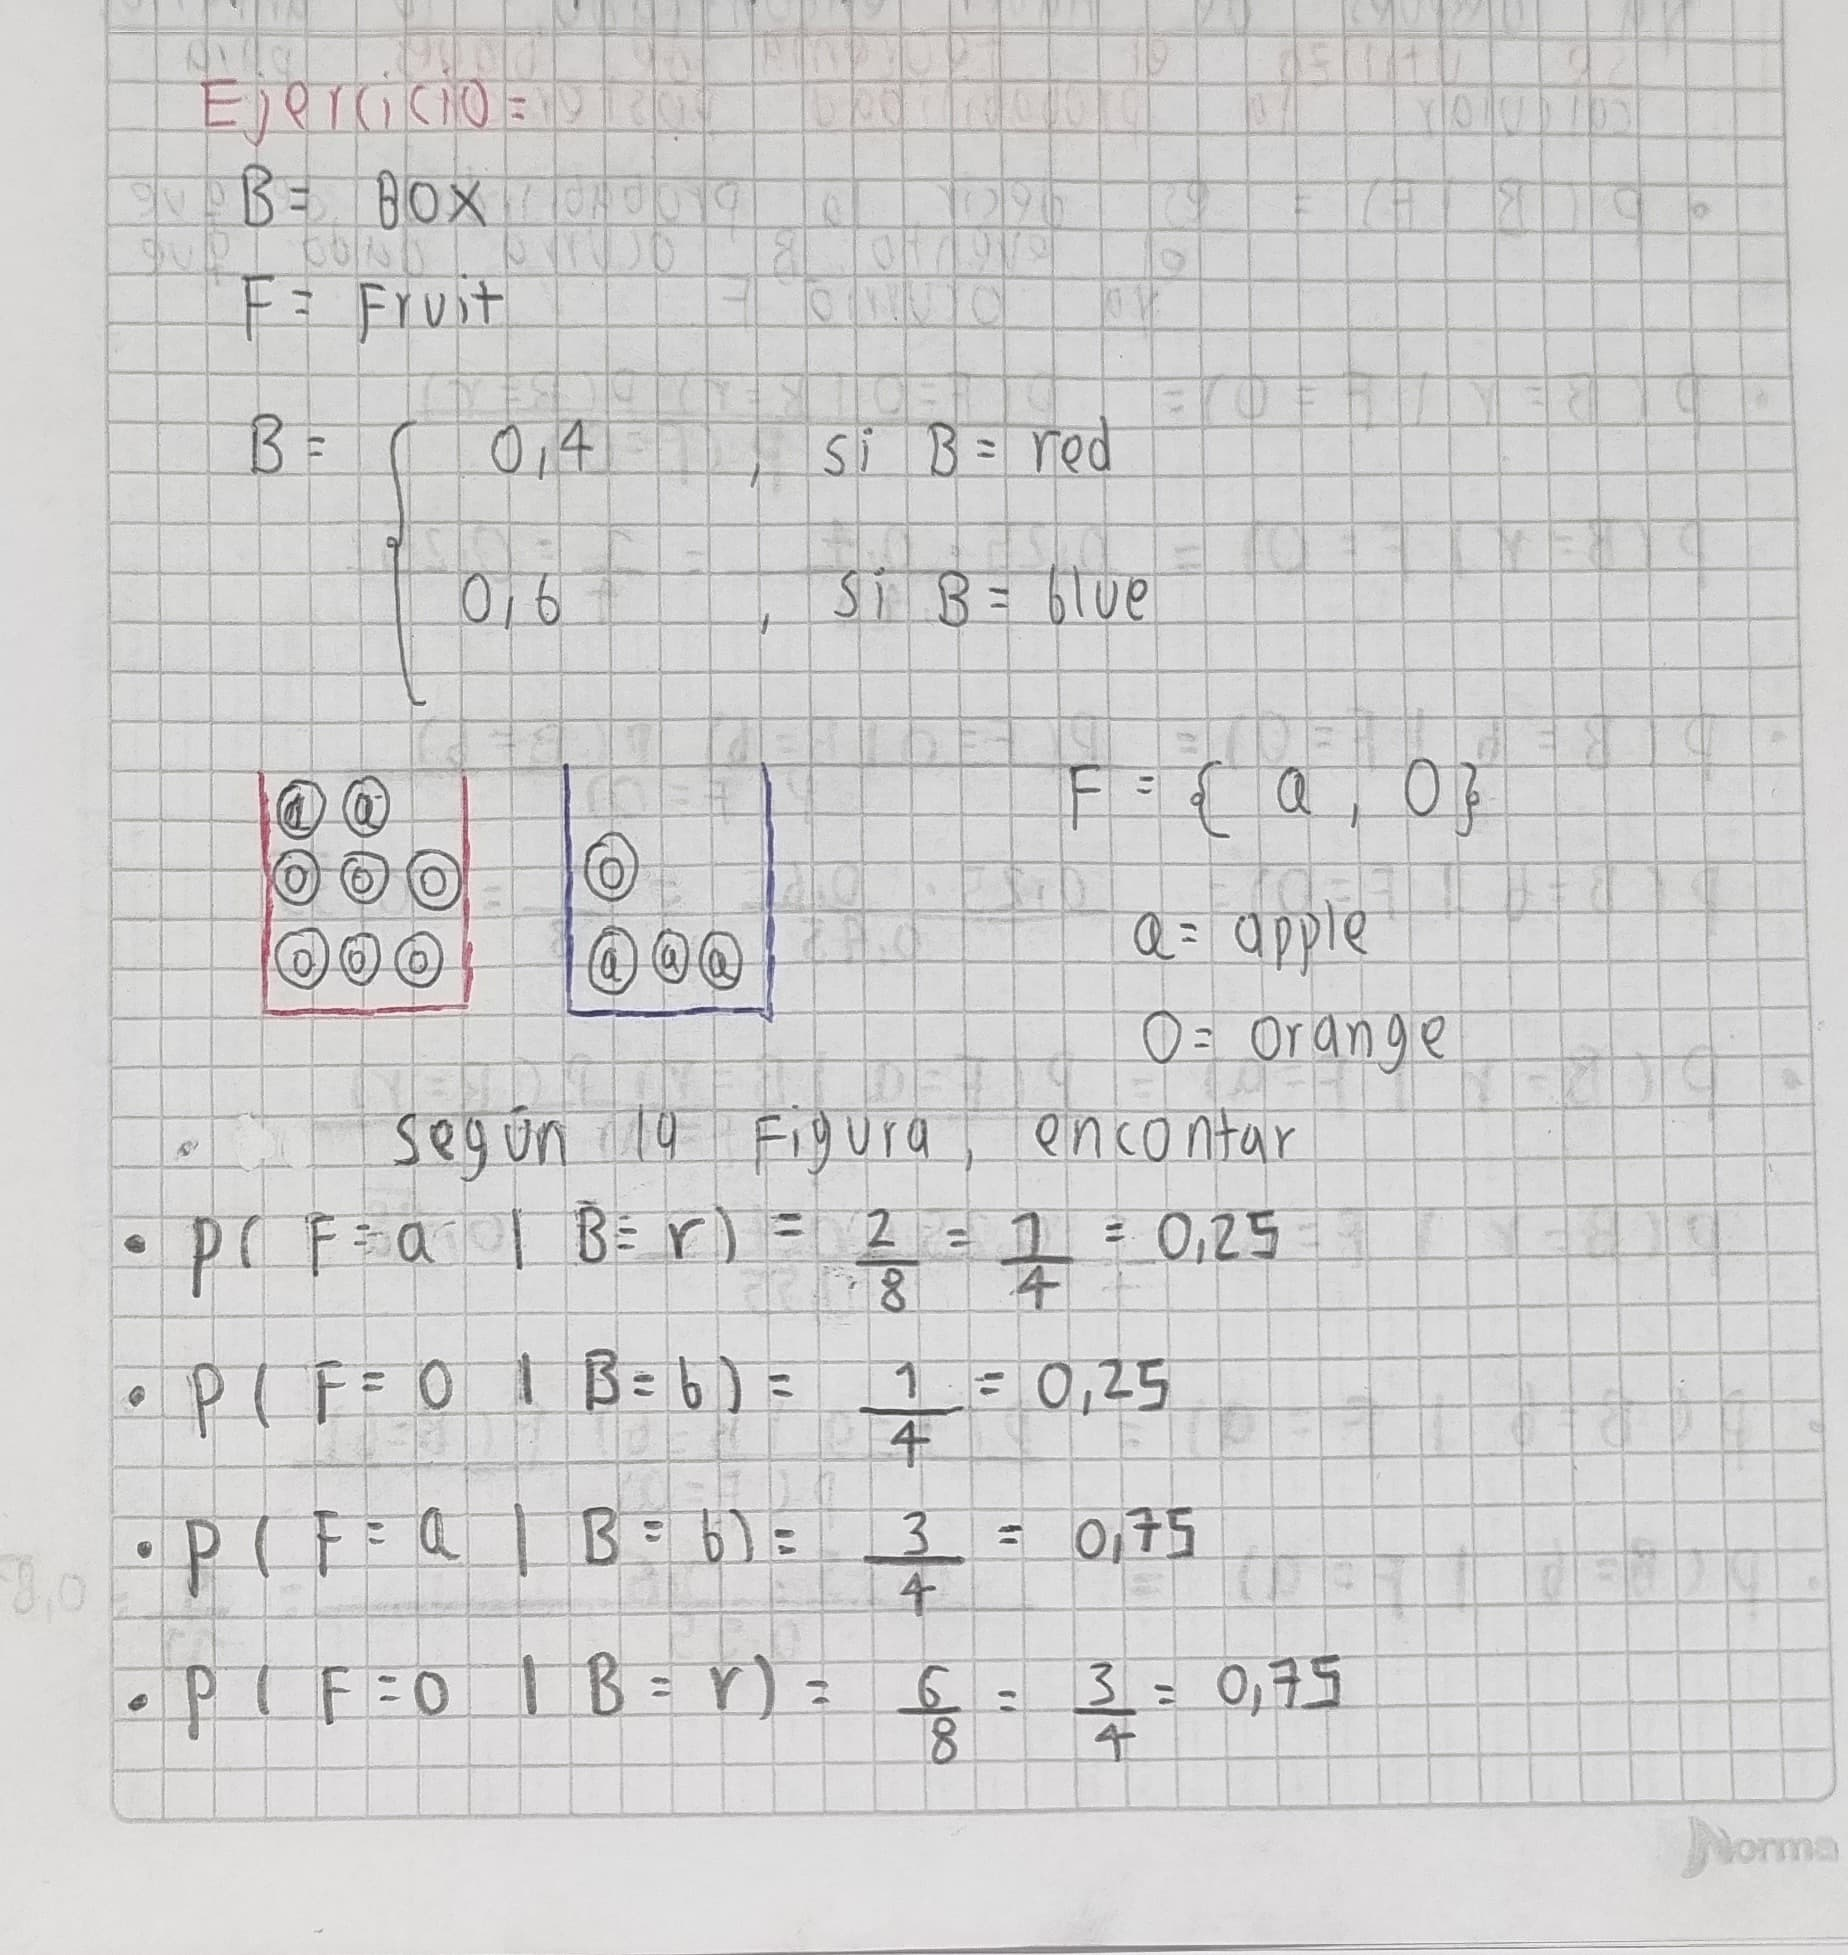

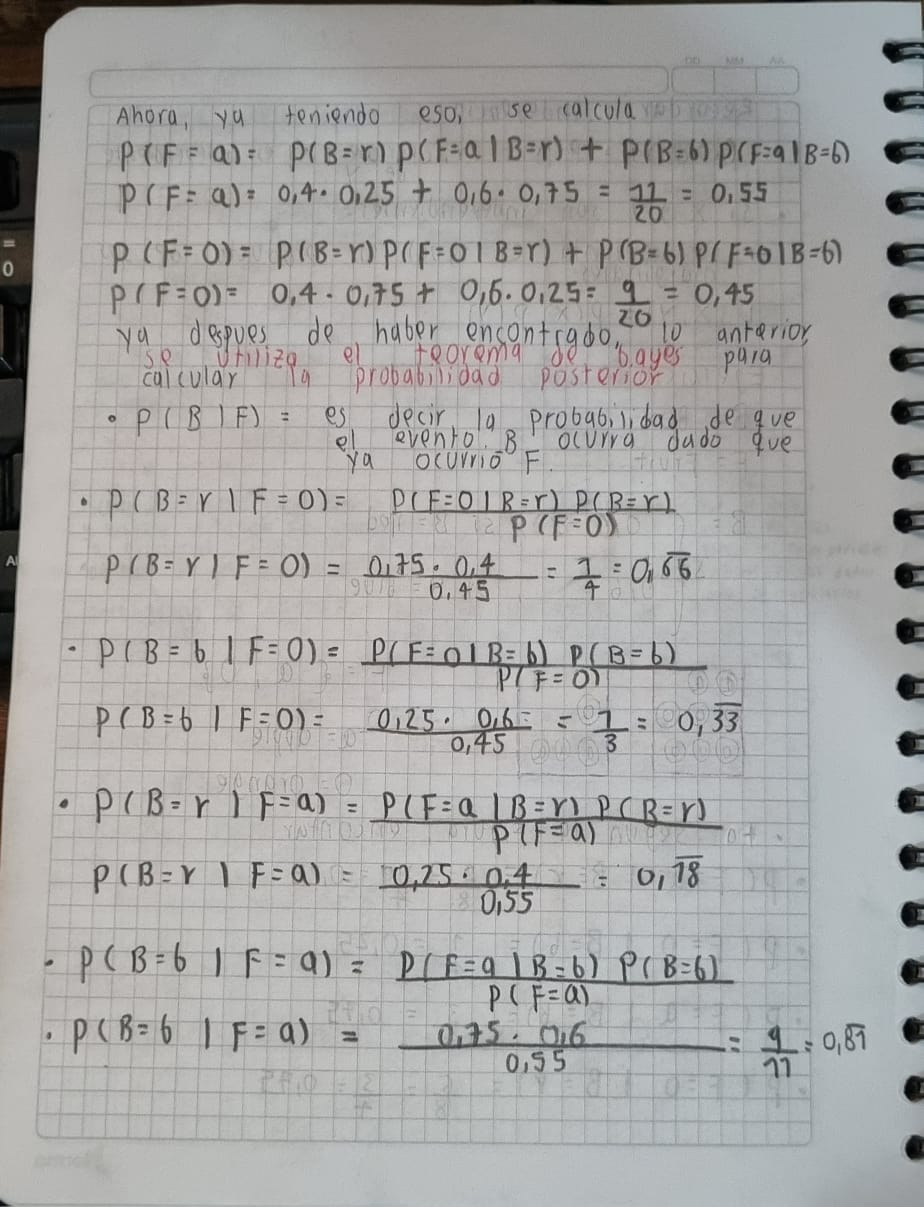

## Simulación

1. Realizar la simulación del ejercicio sobre el teorema de Bayes para las 2 cajas (roja y azul) y 2 frutas (manzana y naranja), donde se calcule:

- Las probabilidades posteriores
- Las verosimilitudes
- Las evidencias

IA utilizada (DeepSeek)

Prompt = "Hola deepSeek, quiero que realices una simulación en python sobre un ejercicio del teorema de bayes:

Se tienen 2 eventos, cajas (B) y frutas (F), las cajas pueden tomar el valor rojo(r)(P(B=r)= 0.4) y azul(b)(P(B=b)= 0.6) las cuales representan las probabilidades previas, las frutas pueden tomar el valor manzana(a) o naranja(o), dentro de la caja roja  hay 6 naranjas y 2 manzanas, y dentro de la caja azul hay 1 naranja y 3 manzanas.

En base a la información anterior, y usando el teorema de bayes y la libreria NumPy ( solo si es necesario),  calcula todas las verosimilitudes,  las probabilidades posteriores y las evidencias, y adicional comenta el codigo"

In [ ]:

# Probabilidades previas de las cajas
P_Br = 0.4  # Probabilidad de caja roja
P_Bb = 0.6  # Probabilidad de caja azul

# Verosimilitudes (likelihoods) - probabilidad de fruta dado el tipo de caja
# Caja roja: 2 manzanas, 6 naranjas (total 8 frutas)
P_a_given_Br = 2/8  # P(manzana|caja roja)
P_o_given_Br = 6/8  # P(naranja|caja roja)

# Caja azul: 3 manzanas, 1 naranja (total 4 frutas)
P_a_given_Bb = 3/4  # P(manzana|caja azul)
P_o_given_Bb = 1/4  # P(naranja|caja azul)

# Calculamos la evidencia P(F) - probabilidad marginal de cada fruta
# P(a) = P(a|Br)P(Br) + P(a|Bb)P(Bb)
P_a = P_a_given_Br * P_Br + P_a_given_Bb * P_Bb
# P(o) = P(o|Br)P(Br) + P(o|Bb)P(Bb)
P_o = P_o_given_Br * P_Br + P_o_given_Bb * P_Bb

# Calculamos las probabilidades posteriores usando el Teorema de Bayes
# P(Br|a) = P(a|Br)*P(Br)/P(a)
P_Br_given_a = (P_a_given_Br * P_Br) / P_a
P_Bb_given_a = (P_a_given_Bb * P_Bb) / P_a

# P(Br|o) = P(o|Br)*P(Br)/P(o)
P_Br_given_o = (P_o_given_Br * P_Br) / P_o
P_Bb_given_o = (P_o_given_Bb * P_Bb) / P_o

# Mostramos resultados
print("=== Verosimilitudes ===")
print(f"P(a|Br) = {P_a_given_Br:.3f}")  # Probabilidad de manzana dado caja roja
print(f"P(o|Br) = {P_o_given_Br:.3f}")  # Probabilidad de naranja dado caja roja
print(f"P(a|Bb) = {P_a_given_Bb:.3f}")  # Probabilidad de manzana dado caja azul
print(f"P(o|Bb) = {P_o_given_Bb:.3f}")  # Probabilidad de naranja dado caja azul

print("\n=== Evidencias (Probabilidades marginales) ===")
print(f"P(a) = {P_a:.3f}")  # Probabilidad total de manzana
print(f"P(o) = {P_o:.3f}")  # Probabilidad total de naranja

print("\n=== Probabilidades posteriores ===")
print(f"P(Br|a) = {P_Br_given_a:.3f}")  # Probabilidad de caja roja dado que se sacó manzana
print(f"P(Bb|a) = {P_Bb_given_a:.3f}")  # Probabilidad de caja azul dado que se sacó manzana
print(f"P(Br|o) = {P_Br_given_o:.3f}")  # Probabilidad de caja roja dado que se sacó naranja
print(f"P(Bb|o) = {P_Bb_given_o:.3f}")  # Probabilidad de caja azul dado que se sacó naranja

=== Verosimilitudes ===
P(a|Br) = 0.250
P(o|Br) = 0.750
P(a|Bb) = 0.750
P(o|Bb) = 0.250

=== Evidencias (Probabilidades marginales) ===
P(a) = 0.550
P(o) = 0.450

=== Probabilidades posteriores ===
P(Br|a) = 0.182
P(Bb|a) = 0.818
P(Br|o) = 0.667
P(Bb|o) = 0.333


2. Realizar la simulación del ejercicio sobre el teorema de Bayes para n cajas y m frutas, donde se calcule:

- Las probabilidades posteriores
- Las verosimilitudes
- Las evidencias

IA utilizada (DeepSeek)

Prompt = "Super bien, ese es el resultado que esperaba. Ahora realiza la simulación donde:

Los eventos sean n cajas y m frutas que van a ser ingresadas por el usuario (con n y m >0, si alguna no cumple, ahi mismo arrojar mensaje de error y volver a preguntarle), le vas a pedir el color de la caja y el nombre de la fruta, y la probabilidad previa (debe estar entre 0 y 1, sino ocurre algo de eso, sacar mensaje de error y vuelvele a preguntar al usuario. Aparte la suma debe dar 1, por tanto en la probabilidad previa de la ultima caja, asignarla automatico para que la suma de 1 y escribir en mensaje avisando eso, asi no le vas a preguntar la probabilidad previa de la ultima caja al usuario), despues le vas a pegruntar por cada caja la cantidad de frutas que hay en esa caja. Finalmente vas a calcular los mismo parametros del anterior prompt, además comenta el código dentro del programa"

In [ ]:
import numpy as np

def obtener_entero_positivo(mensaje):
    """Solicita un entero positivo al usuario con validación"""
    while True:
        try:
            valor = int(input(mensaje))
            if valor > 0:
                return valor
            else:
                print("Error: El valor debe ser mayor que 0. Intente nuevamente.")
        except ValueError:
            print("Error: Debe ingresar un número entero. Intente nuevamente.")

def obtener_probabilidad(mensaje, suma_actual=0):
    """
    Solicita una probabilidad válida al usuario (entre 0 y 1)
    y que no haga que la suma acumulada exceda 1
    """
    while True:
        try:
            valor = float(input(mensaje))
            if 0 <= valor <= 1:
                if suma_actual + valor <= 1:
                    return valor
                else:
                    print(f"Error: La suma acumulada excedería 1. Máximo permitido: {1-suma_actual:.2f}")
            else:
                print("Error: La probabilidad debe estar entre 0 y 1.")
        except ValueError:
            print("Error: Debe ingresar un número. Intente nuevamente.")

def main():
    print("=== Simulación del Teorema de Bayes ===")
    print("Este programa calcula probabilidades posteriores dados tipos de cajas y frutas.")

    # Paso 1: Obtener número de cajas y frutas
    n = obtener_entero_positivo("Ingrese el número de cajas (n > 0): ")
    m = obtener_entero_positivo("Ingrese el número de tipos de frutas (m > 0): ")

    # Paso 2: Obtener información de las cajas
    cajas = []
    frutas = []
    suma_prob = 0.0

    # Primero obtener los nombres de las frutas
    print("\n=== Ingreso de tipos de frutas ===")
    for i in range(m):
        fruta = input(f"Ingrese el nombre de la fruta {i+1}: ").strip()
        frutas.append(fruta)

    # Luego obtener información de cada caja
    print("\n=== Ingreso de información de cajas ===")
    for i in range(n):
        print(f"\nCaja {i+1}:")
        color = input("Ingrese el color de la caja: ").strip()

        # Manejar probabilidad previa (la última se calcula automáticamente)
        if i < n-1:
            prob = obtener_probabilidad(
                f"Ingrese la probabilidad previa para la caja {color} (0-1, suma acumulada: {suma_prob:.2f}): ",
                suma_prob)
            suma_prob += prob
        else:
            prob = 1 - suma_prob
            print(f"Probabilidad automática para la última caja {color}: {prob:.2f} "
                  f"(para completar suma=1.00)")

        # Obtener distribución de frutas en esta caja
        dist_frutas = {}
        total_frutas = 0
        print(f"\nDistribución de frutas para la caja {color}:")

        for j, fruta in enumerate(frutas):
            while True:
                try:
                    cantidad = int(input(f"Ingrese cantidad de {fruta} en caja {color}: "))
                    if cantidad >= 0:
                        dist_frutas[fruta] = cantidad
                        total_frutas += cantidad
                        break
                    else:
                        print("Error: La cantidad no puede ser negativa.")
                except ValueError:
                    print("Error: Debe ingresar un número entero.")

        if total_frutas == 0:
            print("Advertencia: La caja no tiene frutas. Se asignará distribución uniforme.")
            for fruta in frutas:
                dist_frutas[fruta] = 1
            total_frutas = m

        # Almacenar información de la caja
        cajas.append({
            'color': color,
            'prob_prev': prob,
            'dist_frutas': dist_frutas,
            'total_frutas': total_frutas
        })

    # Paso 3: Calcular verosimilitudes (likelihoods)
    print("\n=== Cálculo de verosimilitudes ===")
    likelihoods = {}
    for caja in cajas:
        color = caja['color']
        likelihoods[color] = {}
        for fruta in frutas:
            # P(fruta|caja) = cantidad de esa fruta / total frutas en caja
            prob = caja['dist_frutas'].get(fruta, 0) / caja['total_frutas']
            likelihoods[color][fruta] = prob
            print(f"P({fruta}|{color}) = {prob:.3f}")

    # Paso 4: Calcular probabilidades marginales (evidencia)
    print("\n=== Cálculo de evidencias (probabilidades marginales) ===")
    marginal_probs = {}
    for fruta in frutas:
        # P(fruta) = sumatoria sobre todas las cajas de P(fruta|caja)*P(caja)
        prob = sum(caja['prob_prev'] * likelihoods[caja['color']][fruta] for caja in cajas)
        marginal_probs[fruta] = prob
        print(f"P({fruta}) = {prob:.3f}")

    # Paso 5: Calcular probabilidades posteriores
    print("\n=== Cálculo de probabilidades posteriores ===")
    posterior_probs = {}
    for caja in cajas:
        color = caja['color']
        posterior_probs[color] = {}
        for fruta in frutas:
            # P(caja|fruta) = P(fruta|caja)*P(caja)/P(fruta)
            if marginal_probs[fruta] > 0:
                prob = (likelihoods[color][fruta] * caja['prob_prev']) / marginal_probs[fruta]
            else:
                prob = 0.0  # Evitar división por cero
            posterior_probs[color][fruta] = prob
            print(f"P({color}|{fruta}) = {prob:.3f}")

if __name__ == "__main__":
    main()

=== Simulación del Teorema de Bayes ===
Este programa calcula probabilidades posteriores dados tipos de cajas y frutas.
Ingrese el número de cajas (n > 0): 2
Ingrese el número de tipos de frutas (m > 0): 2

=== Ingreso de tipos de frutas ===
Ingrese el nombre de la fruta 1: manzana
Ingrese el nombre de la fruta 2: naranja

=== Ingreso de información de cajas ===

Caja 1:
Ingrese el color de la caja: roja
Ingrese la probabilidad previa para la caja roja (0-1, suma acumulada: 0.00): 0.4

Distribución de frutas para la caja roja:
Ingrese cantidad de manzana en caja roja: 2
Ingrese cantidad de naranja en caja roja: 6

Caja 2:
Ingrese el color de la caja: azul
Probabilidad automática para la última caja azul: 0.60 (para completar suma=1.00)

Distribución de frutas para la caja azul:
Ingrese cantidad de manzana en caja azul: 3
Ingrese cantidad de naranja en caja azul: 1

=== Cálculo de verosimilitudes ===
P(manzana|roja) = 0.250
P(naranja|roja) = 0.750
P(manzana|azul) = 0.750
P(naranja|azul)

# Ejercicio 2

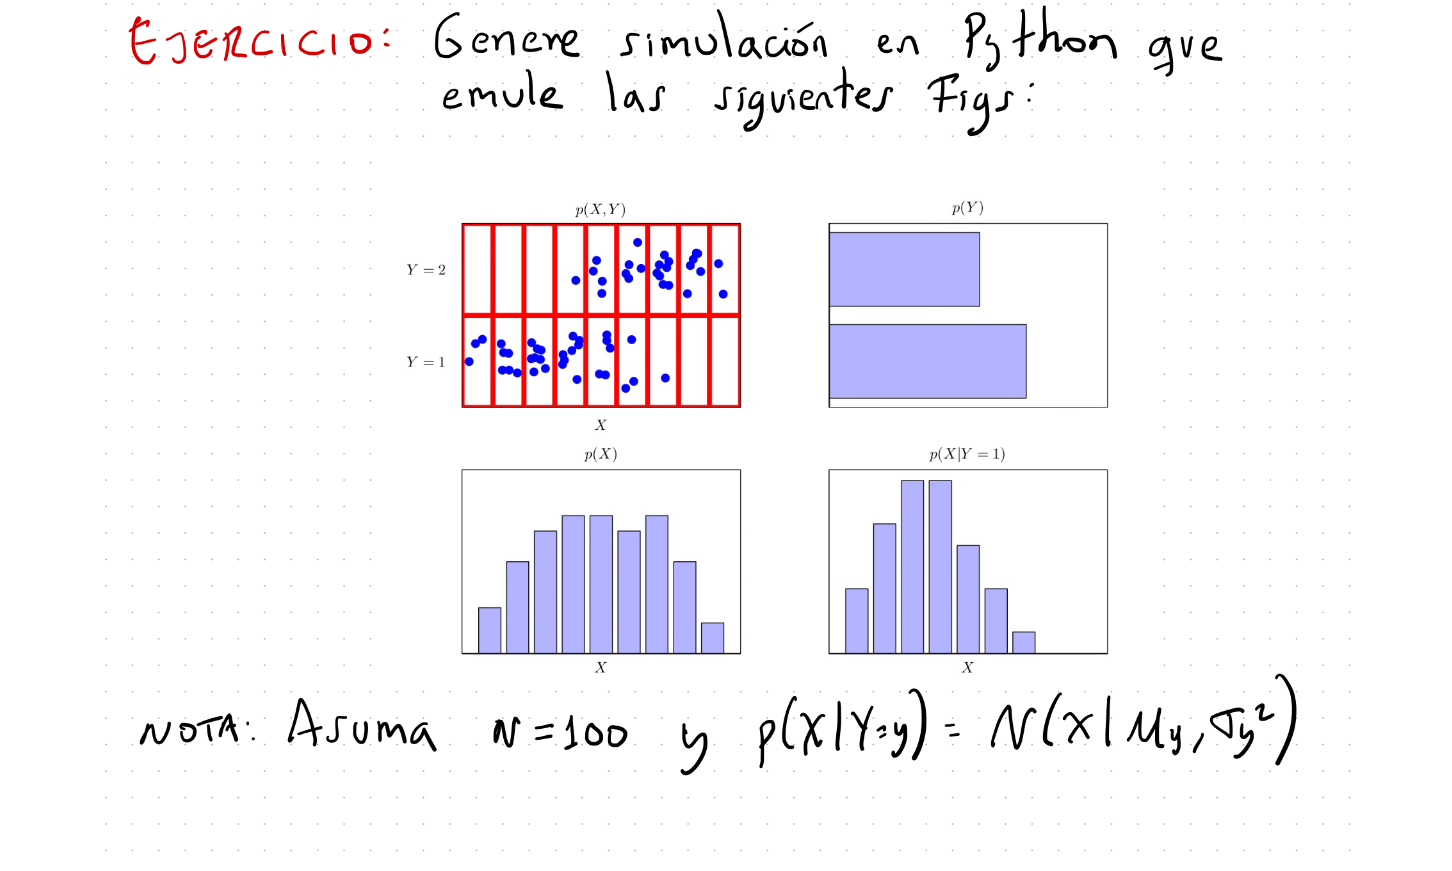

## Solución

IA Utilizada (DeepSeek)

Prompt=

Contexto:
Estoy trabajando en un proyecto de simulación de probabilidades con dos variables aleatorias:

- Y: Variable discreta que toma valores 1 o 2 (sin probabilidades fijas conocidas).

- X: Variable continua cuya distribución condicional P(X|Y) sigue una normal N (media de y, varianza de y)

Requisitos:

1. Generación de datos:

- Crear N = 100 datos aleatorios para (X, Y)

- Y debe generarse de manera que sus probabilidades no sean fijas (ej: no asumir P(Y= 1) = 0.5

- X|Y = y debe seguir una normal con parámetros media de y y desviación estandar de y especificos (ej: media de y=1 es 0, desviación estandar de y=1 es 1, media de y=2 es 3, desviación estandar de y=2 es 1.5)

2. Visualizaciones:

- Gráfico de dispersión de (X, Y)

- Histograma de la probabilidad marginal empírica de Y

- Histograma de la probabilidad marginal empírica de X (en 9 intervalos)

- Histograma + curva teórica de P(X|Y = 1) y P(X|Y = 2)

3. Código:

- Usar una clase en Python (GenerateData ) para encapsular la lógica

- Incluir métodos para estimar párametros empíricos y generar gráficos

Restricciones

- Usar numpy, matplotlib y seaborn


